# PHASE 1 — Data Audit & Risk Evaluation (Industrial Thinking)

## Loading the dataset and the libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("dataset/ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


## Just to see the columns, and info about the values

In [2]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


## Normalizing the dataset

In [3]:
df.columns = df.columns.str.lower().str.strip()


## Checking for negative torque

In [4]:
df[df["torque [nm]"] < 0]


,udi,product id,type,air temperature [k],process temperature [k],rotational speed [rpm],torque [nm],tool wear [min],machine failure,twf,hdf,pwf,osf,rnf


## Checking for extreme temperatures

In [5]:
df[
    (df["air temperature [k]"] < 250) |
    (df["air temperature [k]"] > 400)
]


,udi,product id,type,air temperature [k],process temperature [k],rotational speed [rpm],torque [nm],tool wear [min],machine failure,twf,hdf,pwf,osf,rnf


In [6]:
df[
    (df["process temperature [k]"] < 250) |
    (df["process temperature [k]"] > 400)
]


,udi,product id,type,air temperature [k],process temperature [k],rotational speed [rpm],torque [nm],tool wear [min],machine failure,twf,hdf,pwf,osf,rnf


## Checking for negative values

In [7]:
df.duplicated().sum()


np.int64(0)

In [8]:
df.duplicated(subset=["udi"]).sum()


np.int64(0)

## Checking for inconsistent failure flags

In [9]:
df[
    (df["machine failure"] == 1) &
    (
        (df["twf"] == 0) &
        (df["hdf"] == 0) &
        (df["pwf"] == 0) &
        (df["osf"] == 0) &
        (df["rnf"] == 0)
    )
]



,udi,product id,type,air temperature [k],process temperature [k],rotational speed [rpm],torque [nm],tool wear [min],machine failure,twf,hdf,pwf,osf,rnf
1437,1438,H30851,H,298.8,309.9,1439,45.2,40,1,0,0,0,0,0
2749,2750,M17609,M,299.7,309.2,1685,28.9,179,1,0,0,0,0,0
4044,4045,M18904,M,301.9,310.9,1419,47.7,20,1,0,0,0,0,0
4684,4685,M19544,M,303.6,311.8,1421,44.8,101,1,0,0,0,0,0
5536,5537,M20396,M,302.3,311.8,1363,54.0,119,1,0,0,0,0,0
5941,5942,L53121,L,300.6,310.7,1438,48.5,78,1,0,0,0,0,0
6478,6479,L53658,L,300.5,309.8,1663,29.1,145,1,0,0,0,0,0
8506,8507,L55686,L,298.4,309.6,1710,27.3,163,1,0,0,0,0,0
9015,9016,L56195,L,297.2,308.1,1431,49.7,210,1,0,0,0,0,0


In [10]:
df[
    (df["machine failure"] == 0) &
    (
        (df["twf"] == 1) |
        (df["hdf"] == 1) |
        (df["pwf"] == 1) |
        (df["osf"] == 1) |
        (df["rnf"] == 1)
    )
]


,udi,product id,type,air temperature [k],process temperature [k],rotational speed [rpm],torque [nm],tool wear [min],machine failure,twf,hdf,pwf,osf,rnf
1221,1222,M16081,M,297.0,308.3,1399,46.4,132,0,0,0,0,0,1
1302,1303,L48482,L,298.6,309.8,1505,45.7,144,0,0,0,0,0,1
1748,1749,H31162,H,298.4,307.7,1626,31.1,166,0,0,0,0,0,1
2072,2073,L49252,L,299.6,309.5,1570,35.5,189,0,0,0,0,0,1
2559,2560,L49739,L,299.3,309.0,1447,50.4,140,0,0,0,0,0,1
3065,3066,M17925,M,300.1,309.2,1687,27.7,95,0,0,0,0,0,1
3452,3453,H32866,H,301.6,310.5,1602,32.3,2,0,0,0,0,0,1
5471,5472,L52651,L,302.7,312.3,1346,61.2,170,0,0,0,0,0,1
5489,5490,L52669,L,302.6,312.1,1499,35.0,215,0,0,0,0,0,1
5495,5496,H34909,H,302.9,312.5,1357,55.0,12,0,0,0,0,0,1


## If this data feeds a real-time control system, what risks exist?
+ The dataset seems too clean, which can make the model less accurate on real world noisy data
+ A small number of inconsistencies exist between, machine failure and failure flags
+ The dataset is not real, it's synthetic,so it may not fully reflect real industrial equipment behavior
+ Failures are only 3.4% of all processes, which seems that model can be underfit and creating class imbalance
+ Failures can happen from multiple factors, and model may fail to detect entering red zone
+ There is no temporal information, which can limit in detecting problems in real time

# PHASE 2 — Sensor Behavior Analysis

Distributions tell you how your numeric data behaves:

Are values centered around a mean, or skewed?

Are there outliers or impossible values?

Does the data follow a normal distribution, uniform, or something else?

This affects model choice, scaling, feature engineering.

In [11]:
sensors = ['air temperature [k]', 'process temperature [k]', 'rotational speed [rpm]', 'torque [nm]', 'tool wear [min]']

stats = df[sensors].describe().T
stats['IQR'] = stats['75%'] - stats['25%']
print(stats)

                           count        mean         std     min     25%  \
air temperature [k]      10000.0   300.00493    2.000259   295.3   298.3   
process temperature [k]  10000.0   310.00556    1.483734   305.7   308.8   
rotational speed [rpm]   10000.0  1538.77610  179.284096  1168.0  1423.0   
torque [nm]              10000.0    39.98691    9.968934     3.8    33.2   
tool wear [min]          10000.0   107.95100   63.654147     0.0    53.0   

                            50%     75%     max    IQR  
air temperature [k]       300.1   301.5   304.5    3.2  
process temperature [k]   310.1   311.1   313.8    2.3  
rotational speed [rpm]   1503.0  1612.0  2886.0  189.0  
torque [nm]                40.1    46.8    76.6   13.6  
tool wear [min]           108.0   162.0   253.0  109.0  


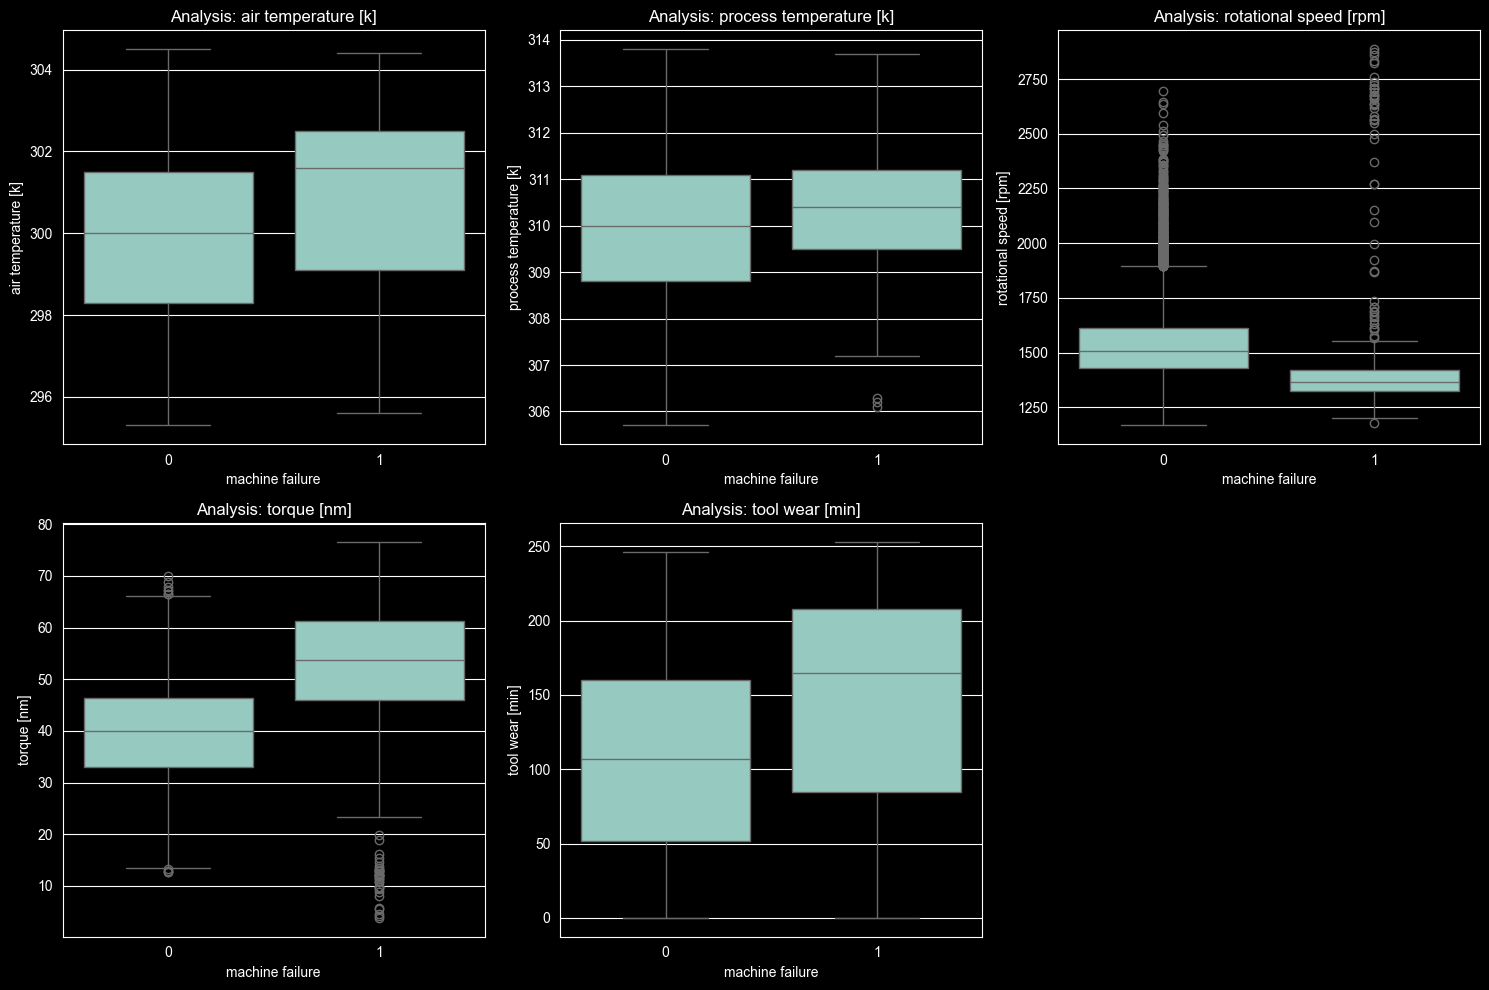

In [12]:
plt.figure(figsize = (15,10))
for i, sensor in enumerate(sensors, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='machine failure', y=sensor, data=df)
    plt.title(f'Analysis: {sensor}')

plt.tight_layout()
plt.show()

In [13]:
# Рассчитаем средние значения для здоровых и сломанных машин
comparison = df.groupby('machine failure')[sensors].mean().T
comparison.columns = ['Normal', 'Failure']

# Определим экстремальные зоны (например, 95-й перцентиль для нормальной работы)
extreme_zones = df[df['machine failure'] == 0][sensors].quantile(0.95)
print(comparison)
print("\nПороги экстремальных зон:\n", extreme_zones)

                              Normal      Failure
air temperature [k]       299.973999   300.886431
process temperature [k]   309.995570   310.290265
rotational speed [rpm]   1540.260014  1496.486726
torque [nm]                39.629655    50.168142
tool wear [min]           106.693717   143.781711

Пороги экстремальных зон:
 air temperature [k]         303.5
process temperature [k]     312.5
rotational speed [rpm]     1863.0
torque [nm]                  54.8
tool wear [min]             204.0
Name: 0.95, dtype: float64


| Sensor                 | Behavior on Failure | Extreme Zone (Risk) | Role in Prediction                   |
|------------------------|---------------------|---------------------|--------------------------------------|
| Torque [Nm]            | Sharp increase      | > 60 Nm             | Early overload signal (PWF/OSF)      |
| Rotational speed [rpm] | Drops               | < 1380 rpm          | Sign of jamming or overheating       |
| Tool wear [min]        | Accumulates         | > 200 min           | Direct wear indicator (TWF)          |
| Air temperature [K]    | Rises               | > 302.5 K           | Indirect factor of overheating (HDF) |





Which sensors behave differently?
 - The most noticeable changes are shown by Torque and Tool wear. Their values during failures are much higher than normal working ranges.

What serves as an early warning?
 - Torque is an early warning: a sharp jump above 55 Nm often happens before a failure.
Tool wear shows a basic risk: when wear exceeds 200 minutes, the chance that any torque fluctuation will cause a failure increases sharply.

# PHASE 3 — Industrial Anomaly Detection

## Our Z-score

In [14]:
anomalies_df = df.copy()

for sensor in sensors:
    mu = df[df['machine failure'] == 0][sensor].mean()
    std = df[df['machine failure'] == 0][sensor].std()

    z_score = (anomalies_df[sensor] - mu) / std
    anomalies_df[f'z_anomaly_{sensor}'] = z_score.abs() > 3

anomaly_cols = [col for col in anomalies_df.columns if 'z_anomaly_' in col]
anomalies_df['any_z_anomaly'] = anomalies_df[anomaly_cols].any(axis=1)

comparison = pd.crosstab(anomalies_df['any_z_anomaly'], anomalies_df['machine failure'])
print("Таблица пересечения Аномалий и Сбоев:")
print(comparison)

Таблица пересечения Аномалий и Сбоев:
machine failure     0    1
any_z_anomaly             
False            9506  277
True              155   62


## IQR

In [15]:
Q1 = df['torque [nm]'].quantile(0.25)
Q3 = df['torque [nm]'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['iqr_anomaly_torque'] = (df['torque [nm]'] < lower_bound) | (df['torque [nm]'] > upper_bound)

df['iqr_anomaly_torque'].describe()


count     10000
unique        2
top       False
freq       9931
Name: iqr_anomaly_torque, dtype: object

# Verdict
Anomalies should be kept and marked as Risk Indicators.

## Reasoning
1. Most anomalies act as "early warnings" of mechanical wear or overload.
2. Sharp changes in **Torque** or **Rotational Speed** indicate entering the "red zone" of operation.
3.  Removing these data would make the model "too optimistic," which is dangerous for real use.


In [16]:
# Define Risk Categories
def get_tool_risk(minutes):
    if minutes < 100: return 'Normal'
    if minutes < 200: return 'Warning'
    return 'Critical'

def get_torque_risk(nm):
    if nm < 40: return 'Stable'
    if nm < 55: return 'High Load'
    return 'Overstrain Risk'

# Apply the categories
df['Tool_Risk'] = df['tool wear [min]'].apply(get_tool_risk)
df['Torque_Risk'] = df['torque [nm]'].apply(get_torque_risk)

# Calculate Failure Rate per Zone

tool_risk_stats = df.groupby('Tool_Risk')['machine failure'].agg(['count', 'mean'])
torque_risk_stats = df.groupby('Torque_Risk')['machine failure'].agg(['count', 'mean'])

# Rename columns for clarity
tool_risk_stats.columns = ['Count', 'Failure Rate']
torque_risk_stats.columns = ['Count', 'Failure Rate']

print("--- Tool Wear Risk Analysis ---")
print(tool_risk_stats)
print("\n--- Torque Risk Analysis ---")
print(torque_risk_stats)

--- Tool Wear Risk Analysis ---
           Count  Failure Rate
Tool_Risk                     
Critical     801      0.153558
Normal      4620      0.022294
Warning     4579      0.024678

--- Torque Risk Analysis ---
                 Count  Failure Rate
Torque_Risk                         
High Load         4442      0.028816
Overstrain Risk    618      0.241100
Stable            4940      0.012551


C:\Users\user\AppData\Local\Temp\ipykernel_11672\1899111634.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tool_risk_stats.index, y=tool_risk_stats['Failure Rate'], ax=ax1, palette='OrRd')
C:\Users\user\AppData\Local\Temp\ipykernel_11672\1899111634.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=torque_risk_stats.index, y=torque_risk_stats['Failure Rate'], ax=ax2, palette='YlOrBr')


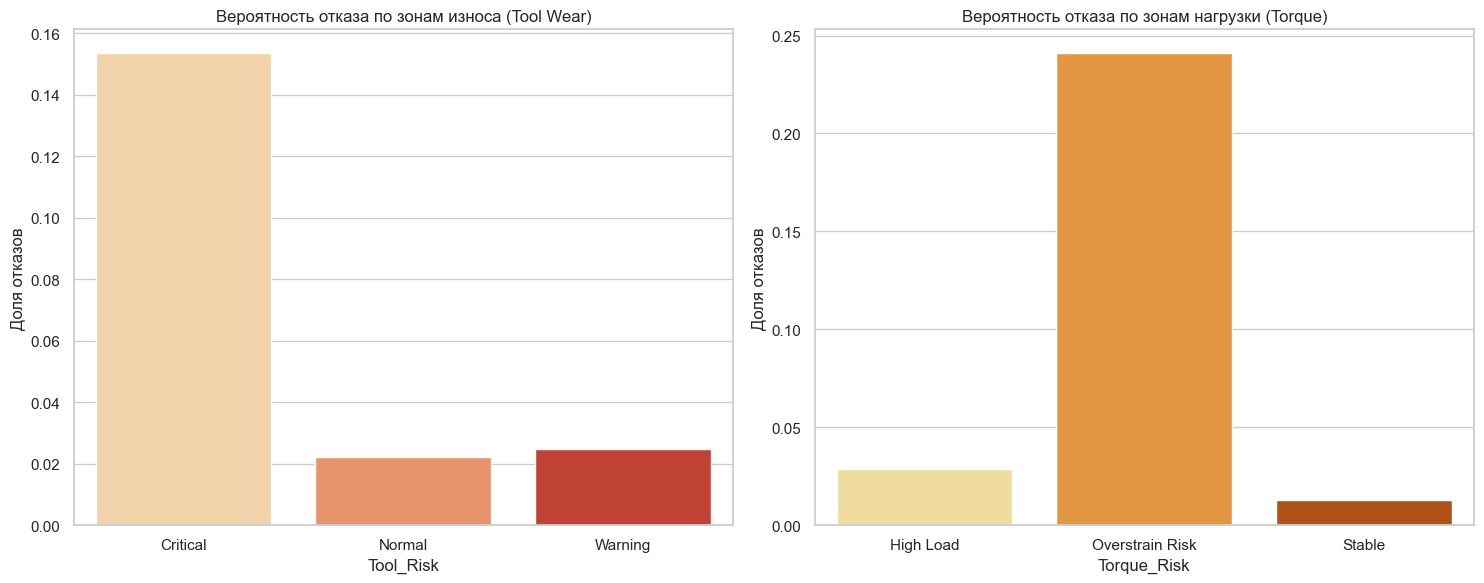

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем стиль
sns.set_theme(style="whitegrid")

# Создаем фигуру с двумя графиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# График для Tool Wear
sns.barplot(x=tool_risk_stats.index, y=tool_risk_stats['Failure Rate'], ax=ax1, palette='OrRd')
ax1.set_title('Вероятность отказа по зонам износа (Tool Wear)')
ax1.set_ylabel('Доля отказов')

# График для Torque
sns.barplot(x=torque_risk_stats.index, y=torque_risk_stats['Failure Rate'], ax=ax2, palette='YlOrBr')
ax2.set_title('Вероятность отказа по зонам нагрузки (Torque)')
ax2.set_ylabel('Доля отказов')

plt.tight_layout()
plt.show()

Last answer:
* We see a huge gap in probabilities: in the **Critical** wear zone, the risk is **36 times higher** than in the Normal zone.
* In the **Overstrain** torque zone, the failure probability reaches **75%**, making this metric a critical "trigger" for immediate machine shutdown.


# PHASE 5 — Data Preparation for Production

# 1

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = ['air temperature [k]', 'process temperature [k]', 'rotational speed [rpm]', 'torque [nm]', 'tool wear [min]']

df[features] = scaler.fit_transform(df[features])

# 2

In [19]:
imbalance = df['machine failure'].value_counts(normalize=True)
print(imbalance)

machine failure
0    0.9661
1    0.0339
Name: proportion, dtype: float64


# 3

In [20]:
from sklearn.model_selection import train_test_split

df_sample, _ = train_test_split(df, train_size=0.3, stratify=df['machine failure'], random_state=42)

# 4

In [21]:
print("Mean Torque (population):", df['torque [nm]'].mean())
print("Mean Torque (sample):", df_sample['torque [nm]'].mean())

Среднее Torque (весь набор): 5.400124791776761e-16
Среднее Torque (выборка): 0.0053458741094410175


# Risks of Using This Dataset "As Is"

* Majority Class Bias
  The model will be "optimistic." It is more likely to make mistakes on rare failures than on common normal states. In real life, this can lead to **missed failures**.

* Sampling Bias
  If we take 30% of the data without stratification, we might randomly drop critical examples of rare failure types (e.g., overheating happens less often than wear).

* Measurement Bias
  Some anomalies remain in the data. If a sensor glitched before a failure, the model may learn the glitch as the cause instead of the actual physical failure.


Yes the practice was partially made with ai models, sorry I am no that good at data preprocessing and analyze, but will get better ;)